In [388]:
#render figures inline.
%matplotlib inline  

import matplotlib.pyplot as plt

import seaborn as sns

import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import warnings
warnings.filterwarnings("ignore")
seed = 42
np.random.seed(seed) 

In [ ]:
# !pip install xgboost
# !pip install xgboost-0.81-py2.py3-none-manylinux1_x86_64.whl

# Exploratory Data Analysis

In [389]:
# from google.colab import drive
# drive.mount('/content/drive')

In [390]:
import datetime
now = datetime.datetime.now()
timestamp = now.strftime("%Y-%m-%d")

In [391]:
# dir = '/content/drive/MyDrive/Work/Omdena/Ethiopia NLP/project/Ethiopian-languages-DS/'
# data_dir = dir + 'data/'
# reports_dir = dir + 'reports/' + timestamp + '/'

In [392]:
dir = '../'
data_dir = dir + 'data/'
reports_dir = dir + 'reports/' + timestamp + '/'

In [393]:
import os
if not os.path.exists(reports_dir):
    os.makedirs(reports_dir)

In [394]:
path = data_dir + 'Amharic_corpus_merged_2023-04-16.csv'
data = pd.read_csv(path)

data = shuffle(data)
data.head()

,article,category
57065,\n\n\nማክሰኞ ሰኔ 7 ቀን 2014 ዓ.ም. በሕዝብ ተወካዮች ምክር ቤት...,Politics
9169,አዲስ አበባ ፣ ሚያዚያ 24 ፣ 2012 (ኤፍ ቢ ሲ) ገቢው የኮሮና ቫይረ...,Local News
9807,ጎንደር ላይ በተደረገው የሊጉ የሁለተኛ ሳምንት ጨዋታ ፋሲል ከነማ ከሙጂብ...,Sports
60678,\n\n\nየሕዝብ ተወካዮች ምክር ቤት ‹‹በሕግ ተመራቂ ተማሪዎች የመውጫ ...,Politics
44025,በኢትዮጵያ ፕሪምየር ሊግ 16ኛ ሳምንት ድሬዳዋ ላይ ድሬዳዋ ከተማ ከ ኢት...,Sports


In [395]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61915 entries, 57065 to 56422
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   61915 non-null  object
 1   category  61915 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [396]:
data.category.value_counts()

Local News            20674
Politics              14481
Sports                10411
Business               9170
International News     6543
Entertainment           635
Others                    1
Name: category, dtype: int64

In [397]:
data.category.unique()

array(['Politics', 'Local News', 'Sports', 'Business',
       'International News', 'Entertainment', 'Others'], dtype=object)

Those are:

['Politics', 'Local News', 'Sports', 'International News', 'Business', 'Entertainment']

In [398]:
# df = data.copy()
# d_replace = {'ፖለቲካ':'Politics', 'ሀገር አቀፍ ዜና':'Local News', 'ስፖርት':'Sports', 'ዓለም አቀፍ ዜና':'International News', 'ቢዝነስ':'Business', 'መዝናኛ':'Entertainment', np.nan:'Others'}
# df.category = df.category.map(d_replace)
# df.sample(10)

In [399]:
# cat_labels = df.category.unique()
# cat_labels

In [400]:
# data = df.copy()    # back to normal dataframe

In [401]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61915 entries, 57065 to 56422
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   61915 non-null  object
 1   category  61915 non-null  object
dtypes: object(2)
memory usage: 1.4+ MB


In [402]:
data.isna().sum()

article     0
category    0
dtype: int64

In [403]:
# data = data.dropna(subset=['article'])

In [404]:
data.category.value_counts()

Local News            20674
Politics              14481
Sports                10411
Business               9170
International News     6543
Entertainment           635
Others                    1
Name: category, dtype: int64

We will remove Others and Entertainment due to problems in inbalanced data.

In [405]:
df = data[(data.category != 'Entertainment') & (data.category != 'Others')]
df.category.unique()

array(['Politics', 'Local News', 'Sports', 'Business',
       'International News'], dtype=object)

In [406]:
data = df.copy()

In [407]:
data['word_len'] = data['article'].str.split().str.len()
data.head()

,article,category,word_len
57065,\n\n\nማክሰኞ ሰኔ 7 ቀን 2014 ዓ.ም. በሕዝብ ተወካዮች ምክር ቤት...,Politics,997
9169,አዲስ አበባ ፣ ሚያዚያ 24 ፣ 2012 (ኤፍ ቢ ሲ) ገቢው የኮሮና ቫይረ...,Local News,59
9807,ጎንደር ላይ በተደረገው የሊጉ የሁለተኛ ሳምንት ጨዋታ ፋሲል ከነማ ከሙጂብ...,Sports,530
60678,\n\n\nየሕዝብ ተወካዮች ምክር ቤት ‹‹በሕግ ተመራቂ ተማሪዎች የመውጫ ...,Politics,374
44025,በኢትዮጵያ ፕሪምየር ሊግ 16ኛ ሳምንት ድሬዳዋ ላይ ድሬዳዋ ከተማ ከ ኢት...,Sports,254


In [408]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61279 entries, 57065 to 56422
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   article   61279 non-null  object
 1   category  61279 non-null  object
 2   word_len  61279 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


In [409]:
data.word_len.mean()

297.49873529267774

# character level normalization

Amharic has characters wich have the same sound that can be interchangably used.

for example letters 'ሃ','ኅ','ኃ','ሐ','ሓ','ኻ','ሀ' have the same sound so we change them to 'ሀ' 

In [410]:
import re
#method to normalize character level missmatch such as ጸሀይ and ፀሐይ
def normalize_char_level_missmatch(input_token):
    rep=re.sub('[ሃኅኃሐሓኻ]','ሀ',input_token)
    rep=re.sub('[ሑኁዅ]','ሁ',rep)
    rep=re.sub('[ኂሒኺ]','ሂ',rep)
    rep=re.sub('[ኌሔዄ]','ሄ',rep)
    rep=re.sub('[ሕኅ]','ህ',rep)
    rep=re.sub('[ኆሖኾ]','ሆ',rep)
    rep=re.sub('[ሠ]','ሰ',rep)
    rep=re.sub('[ሡ]','ሱ',rep)
    rep=re.sub('[ሢ]','ሲ',rep)
    rep=re.sub('[ሣ]','ሳ',rep)
    rep=re.sub('[ሤ]','ሴ',rep)
    rep=re.sub('[ሥ]','ስ',rep)
    rep=re.sub('[ሦ]','ሶ',rep)
    rep=re.sub('[ዓኣዐ]','አ',rep)
    rep=re.sub('[ዑ]','ኡ',rep)
    rep=re.sub('[ዒ]','ኢ',rep)
    rep=re.sub('[ዔ]','ኤ',rep)
    rep=re.sub('[ዕ]','እ',rep)
    rep=re.sub('[ዖ]','ኦ',rep)
    rep=re.sub('[ጸ]','ፀ',rep)
    rep=re.sub('[ጹ]','ፁ',rep)
    rep=re.sub('[ጺ]','ፂ',rep)
    rep=re.sub('[ጻ]','ፃ',rep)
    rep=re.sub('[ጼ]','ፄ',rep)
    rep=re.sub('[ጽ]','ፅ',rep)
    rep=re.sub('[ጾ]','ፆ',rep)

    #Normalizing words with Labialized Amharic characters such as በልቱዋል or  በልቱአል to  በልቷል  
    rep=re.sub('(ሉ[ዋአ])','ሏ',rep)
    rep=re.sub('(ሙ[ዋአ])','ሟ',rep)
    rep=re.sub('(ቱ[ዋአ])','ቷ',rep)
    rep=re.sub('(ሩ[ዋአ])','ሯ',rep)
    rep=re.sub('(ሱ[ዋአ])','ሷ',rep)
    rep=re.sub('(ሹ[ዋአ])','ሿ',rep)
    rep=re.sub('(ቁ[ዋአ])','ቋ',rep)
    rep=re.sub('(ቡ[ዋአ])','ቧ',rep)
    rep=re.sub('(ቹ[ዋአ])','ቿ',rep)
    rep=re.sub('(ሁ[ዋአ])','ኋ',rep)
    rep=re.sub('(ኑ[ዋአ])','ኗ',rep)
    rep=re.sub('(ኙ[ዋአ])','ኟ',rep)
    rep=re.sub('(ኩ[ዋአ])','ኳ',rep)
    rep=re.sub('(ዙ[ዋአ])','ዟ',rep)
    rep=re.sub('(ጉ[ዋአ])','ጓ',rep)
    rep=re.sub('(ደ[ዋአ])','ዷ',rep)
    rep=re.sub('(ጡ[ዋአ])','ጧ',rep)
    rep=re.sub('(ጩ[ዋአ])','ጯ',rep)
    rep=re.sub('(ጹ[ዋአ])','ጿ',rep)
    rep=re.sub('(ፉ[ዋአ])','ፏ',rep)
    rep=re.sub('[ቊ]','ቁ',rep) #ቁ can be written as ቊ
    rep=re.sub('[ኵ]','ኩ',rep) #ኩ can be also written as ኵ  
    return rep


In [411]:
data['article'] = data['article'].str.replace(r'[^\w\s]','')

In [412]:
data['article'] = data['article'].apply(lambda x: normalize_char_level_missmatch(x))

In [413]:
n_data = data[['article','category']]
n_data.head()

,article,category
57065,\n\n\nማክሰኞ ሰኔ 7 ቀን 2014 አም በህዝብ ተወካዮች ምክር ቤት 1...,Politics
9169,አዲስ አበባ ሚያዚያ 24 2012 ኤፍ ቢ ሲ ገቢው የኮሮና ቫይረስን ለ...,Local News
9807,ጎንደር ላይ በተደረገው የሊጉ የሁለተኛ ሳምንት ጨዋታ ፋሲል ከነማ ከሙጂብ...,Sports
60678,\n\n\nየህዝብ ተወካዮች ምክር ቤት በህግ ተመራቂ ተማሪዎች የመውጫ ፈተ...,Politics
44025,በኢትዮጵያ ፕሪምየር ሊግ 16ኛ ሳምንት ድሬዳዋ ላይ ድሬዳዋ ከተማ ከ ኢት...,Sports


## Tokenization and Segmentation

[reference]('https://github.com/uhh-lt/amharicprocessor')

In [414]:
# pip install amseg

In [415]:
# from amseg.amharicSegmenter import AmharicSegmenter
# sent_punct = []
# word_punct = []
# segmenter = AmharicSegmenter(sent_punct,word_punct)
# words = segmenter.amharic_tokenizer("እአበበ በሶ በላ።")
# sentences = segmenter.tokenize_sentence("እአበበ በሶ በላ። ከበደ ጆንያ፤ ተሸከመ፡!ለምን?")

In [416]:
n_data['article'][0]

'አባስ ሁሴን በዋሺንግተን ዲሲ እና አካባቢዎ ከ20 አመት በላይ የኖረ ትውልደ ኢትዮጵያዊ ነው አባስ ከሚታወቅበት የንግድ እንቅስቃሴ በተጨማሪ ትውልደኢትዮጵያዊያንን በሚያግዙ የበጎ አድራጎት ስራዎችም ንቁ ተሳታፊነቱ ይታወቃል የኮቪድ 19 መስፋፋትን ተከትሎ አባስ እንደለመደው ከኢትዮጵያ ዲያስፖራ ሙስሊም ማህበረሰብ ጋር ተሰባስቦ የኢድ አል አድሀን በአል ማክበር ባይችልም ያለፉ በአሎችን ትዝታዎች እየዘከረ ከቤተሰቦቹ ጋር በአሉን ለማሳለፍ እንደጣረ ለአሜሪካ ድምፅ ራዲዮ ተናግሯል\n'

In [417]:
from nltk.tokenize import word_tokenize

text = n_data['article'][0]
word_token = word_tokenize(text)
word_token

['አባስ',
 'ሁሴን',
 'በዋሺንግተን',
 'ዲሲ',
 'እና',
 'አካባቢዎ',
 'ከ20',
 'አመት',
 'በላይ',
 'የኖረ',
 'ትውልደ',
 'ኢትዮጵያዊ',
 'ነው',
 'አባስ',
 'ከሚታወቅበት',
 'የንግድ',
 'እንቅስቃሴ',
 'በተጨማሪ',
 'ትውልደኢትዮጵያዊያንን',
 'በሚያግዙ',
 'የበጎ',
 'አድራጎት',
 'ስራዎችም',
 'ንቁ',
 'ተሳታፊነቱ',
 'ይታወቃል',
 'የኮቪድ',
 '19',
 'መስፋፋትን',
 'ተከትሎ',
 'አባስ',
 'እንደለመደው',
 'ከኢትዮጵያ',
 'ዲያስፖራ',
 'ሙስሊም',
 'ማህበረሰብ',
 'ጋር',
 'ተሰባስቦ',
 'የኢድ',
 'አል',
 'አድሀን',
 'በአል',
 'ማክበር',
 'ባይችልም',
 'ያለፉ',
 'በአሎችን',
 'ትዝታዎች',
 'እየዘከረ',
 'ከቤተሰቦቹ',
 'ጋር',
 'በአሉን',
 'ለማሳለፍ',
 'እንደጣረ',
 'ለአሜሪካ',
 'ድምፅ',
 'ራዲዮ',
 'ተናግሯል']

## Stop Words

In [418]:
sw_path = data_dir + 'consolidated_stop_words_2023.csv'

sw_list = []
with open(sw_path, mode='r', encoding='utf-8') as f:
    reader = f.readlines()
    for line in  reader:
        sw_list.append(line.strip())

#skip the first line (header)
sw_list = sw_list[1:]
sw_list[:10]

['ይኖረዋል',
 'እላችኋለሁ',
 'አጠናቀዋል',
 'አልቀረበም',
 'ሆይ',
 'አልታየም',
 'አስገብተዋል',
 'አትቷል',
 'ይከፍታል',
 'የለም']

In [419]:
len(sw_list)

714

In [420]:
stopwords = sw_list

def clean_text(text):
    from nltk.tokenize import word_tokenize
    word_token = word_tokenize(text)
    tokens_without_punc = [w for w in word_token if w.isalnum()] # .isalnum() for number and text
    token_without_sw = [t for t in tokens_without_punc if t not in stopwords] # if you make a sentiment analysis , you can't remove 
                                                                           # negative auxiliary verb
    return ' '.join(token_without_sw)

clean_text(n_data['article'][0])

'አባስ ሁሴን በዋሺንግተን ዲሲ አካባቢዎ ከ20 አመት የኖረ ትውልደ ኢትዮጵያዊ አባስ ከሚታወቅበት የንግድ እንቅስቃሴ በተጨማሪ ትውልደኢትዮጵያዊያንን በሚያግዙ የበጎ አድራጎት ስራዎችም ንቁ ተሳታፊነቱ የኮቪድ 19 መስፋፋትን ተከትሎ አባስ እንደለመደው ከኢትዮጵያ ዲያስፖራ ሙስሊም ማህበረሰብ ተሰባስቦ የኢድ አድሀን በአል ማክበር ባይችልም ያለፉ በአሎችን ትዝታዎች እየዘከረ ከቤተሰቦቹ በአሉን ለማሳለፍ እንደጣረ ለአሜሪካ ድምፅ ራዲዮ'

In [421]:
n_data['article'] = n_data['article'].apply(clean_text)

In [422]:
n_data['article'][:3]

57065    ማክሰኞ ሰኔ 7 ቀን 2014 በህዝብ ተወካዮች ምክር ቤት 13ኛ መደበኛ ስ...
9169     አዲስ አበባ ሚያዚያ 24 2012 ኤፍ ገቢው የኮሮና ቫይረስን ለመከላከል ...
9807     ጎንደር በተደረገው የሊጉ የሁለተኛ ሳምንት ጨዋታ ፋሲል ከነማ ከሙጂብ ቃሲ...
Name: article, dtype: object

In [423]:
text,label = n_data['article'].values , n_data['category'].values

## Model Evaluation

In [424]:
# from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [425]:
def print_eval(title, model, X_train, X_test, y_train, y_test):
    from sklearn.metrics import confusion_matrix, classification_report

    print(title)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))

    print("Test_Set")
    print(classification_report(y_test, y_pred)) #, target_names=cat_labels))

    print("Train_Set")
    print(classification_report(y_train, y_pred_train)) #, target_names=cat_labels))
    

# Count Vectorizer

In [545]:
from sklearn.feature_extraction.text import CountVectorizer
matrix = CountVectorizer(analyzer='word',max_features=1000, ngram_range=(1, 3))
X = matrix.fit_transform(text).toarray()
Y = label.copy()
X, Y

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=int64),
 array(['Politics', 'Local News', 'Sports', ..., 'Business', 'Local News',
        'Business'], dtype=object))

In [427]:
# unique_label = list(set(label))
# Y= []
# for i in label:
#     Y.append(unique_label.index(i))

In [546]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=42)

In [434]:
feature = 'Business'

In [435]:
def store_result(title, feature, y, y_pred, visualizer):
  from sklearn.metrics import f1_score, recall_score
  d = {"Model":[], "F1_score": [], "Recall_score":[], "Prec_Recall_score":[]}
  d["Model"].append(title)

  f1_ = f1_score(y, y_pred, labels=[feature], average=None)[0]
  d["F1_score"].append(f1_)

  recall_ = recall_score(y, y_pred, labels=[feature], average=None)[0]
  d["Recall_score"].append(recall_)

  d["Prec_Recall_score"].append(visualizer.score_[feature])

  df = pd.DataFrame(d)

  filename = reports_dir + 'Results_' + feature + '.csv'

  import os
  if not os.path.isfile(filename):
    df.to_csv(filename, header=d.keys(), index=False)  
  else:         
    df.to_csv(filename, mode='a', header=False, index=False)

In [ ]:
# def store_prec_recall_result(title, score:float):
#   d = {"Model":[], "Prec_Recall_score":[]}
#   d["Model"].append(title)

#   d["Prec_Recall_score"].append(score)

#   df = pd.DataFrame(d)

#   filename = reports_dir + 'Results' + '.csv'

#   import os
#   if not os.path.isfile(filename):
#     df.to_csv(filename, header=d.keys(), index=False)  
#   else:         
#     df.to_csv(filename, mode='a', header=False, index=False)

In [436]:
def read_results():
    return pd.read_csv(reports_dir, index=False)

## XGBoost

In [474]:
method_name = 'XGBoost CntVec'

In [475]:
Y

array(['Politics', 'Local News', 'Sports', ..., 'Business', 'Local News',
       'Business'], dtype=object)

In [476]:
np.unique(Y)

array(['Business', 'International News', 'Local News', 'Politics',
       'Sports'], dtype=object)

In [477]:
d_replace = { "Business": 0,
    "International News": 1,
            "Local News": 2,
              "Politics": 3,
                "Sports": 4,
                # "Entertainment": 5,
                # "Others": 6 
                }

Y_ = pd.Series(Y).map(d_replace).to_numpy(dtype=int)
np.unique(Y_)

array([0, 1, 2, 3, 4])

In [478]:
# df = data.copy()

# df.category = Y_
# # df.category = df.category.astype(int)
# df.sample(10)

In [479]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y_     , stratify=Y_, test_size=0.2, random_state=42)

In [480]:
from xgboost import XGBClassifier

classifier = XGBClassifier(tree_method='gpu_hist', random_state=42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

[12:26:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8330613577023499

In [481]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

XGBoost CntVec
[[1497   13  207  115    2]
 [  14  990  236   58   11]
 [ 155  172 3454  326   28]
 [ 120   85  400 2284    7]
 [   0   11   84    2 1985]]
Test_Set
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1834
           1       0.78      0.76      0.77      1309
           2       0.79      0.84      0.81      4135
           3       0.82      0.79      0.80      2896
           4       0.98      0.95      0.96      2082

    accuracy                           0.83     12256
   macro avg       0.84      0.83      0.83     12256
weighted avg       0.83      0.83      0.83     12256

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.88      0.90      7336
           1       0.85      0.85      0.85      5234
           2       0.86      0.91      0.88     16539
           3       0.91      0.88      0.90     11585
           4       0.99      0.96      0.98      8329

    accura

We have an overfitting here. The result of test set is lower than train set. Accuracy has 10 percent difference which means overfitting.

In [482]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}


param_grid = {"n_estimators":[50, 100],
             'max_depth':[3,4], 
             "learning_rate": [0.1, 0.2],
             "subsample":[0.5, 0.8], 
             "colsample_bytree":[0.5,0.7]}
njobs = 2
xgb_model = XGBClassifier(tree_method='gpu_hist', random_state=42)
xgb_grid = GridSearchCV(xgb_model, param_grid=param_grid, scoring=scoring, refit=False, verbose=2, n_jobs = njobs)
xgb_grid.fit(X_train, y_train)
xgb_grid.best_params_

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = [feature]
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, average=None) , #labels=features),
            'recall': make_scorer(recall_score, average=None) , #labels = features),
            'f1': make_scorer(f1_score, average=None) #, labels = features)
            }

# scoring = 'f1'

#model with best parameters
model = XGBClassifier(
    colsample_bytree = 0.5,
    learning_rate = 0.1,
    max_depth = 2,
    n_estimators = 50,
    subsample = 0.5
    random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

In [483]:
from yellowbrick.classifier import PrecisionRecallCurve

xgb_model = XGBClassifier(
    colsample_bytree = 0.5,
    learning_rate = 0.1,
    max_depth = 2,
    n_estimators = 50,
    subsample = 0.5
    random_state=42)

viz = PrecisionRecallCurve(
    xgb_model,
    title="Precision-Recall Curve for XGBClassifier (CountVec)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

[12:34:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost CntVec
[[1421   24  237  150    2]
 [  21  931  283   66    8]
 [ 143  250 3366  348   28]
 [ 156  133  496 2104    7]
 [   0   56   57    8 1961]]
Test_Set
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1834
           1       0.67      0.71      0.69      1309
           2       0.76      0.81      0.79      4135
           3       0.79      0.73      0.76      2896
           4       0.98      0.94      0.96      2082

    accuracy                           0.80     12256
   macro avg       0.80      0.79      0.80     12256
weighted avg       0.80      0.80      0.80     12256

Train_Set
              precision  

In [486]:
score 

0.9127336520467294

In [487]:
np.unique(y_pred)

array([0, 1, 2, 3, 4])

In [488]:
store_result(method_name, feature, y_test, y_pred, viz)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
matrix = TfidfVectorizer(analyzer='word',max_features=1000,ngram_range=(1, 3))
X2 = matrix.fit_transform(text).toarray()
Y2 = label.copy()
X2, Y2

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.04682348, ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array(['Politics', 'Local News', 'Sports', ..., 'Business', 'Local News',
        'Business'], dtype=object))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, Y2, stratify=Y2, test_size=0.2, random_state=42)

## XGBoost

In [ ]:
method_name = 'XGBoost TF-iDF'

In [534]:
Y2

array(['Politics', 'Local News', 'Sports', ..., 'Business', 'Local News',
       'Business'], dtype=object)

In [535]:
np.unique(Y2)

array(['Business', 'International News', 'Local News', 'Politics',
       'Sports'], dtype=object)

In [ ]:
d_replace = { "Business": 0,
    "International News": 1,
            "Local News": 2,
              "Politics": 3,
                "Sports": 4,
        # "Entertainment": 5,
        #         "Others": 6 
                }

Y2_ = pd.Series(Y2).map(d_replace).to_numpy(dtype=int)
np.unique(Y2_)

array([0, 1, 2, 3, 4])

In [537]:
# df = data.copy()

# df.category = Y_
# # df.category = df.category.astype(int)
# df.sample(10)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X2, Y2_     , stratify=Y_    , test_size=0.2, random_state=42)

In [539]:
from xgboost import XGBClassifier
classifier = XGBClassifier(random_state=42)
classifier.fit(X_train,y_train)

# Predict Class
y_pred = classifier.predict(X_test)

# Accuracy 
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

accuracy

[15:37:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8347748041775457

In [540]:
print_eval(method_name, classifier, X_train, X_test, y_train, y_test)

XGBoost TF-iDF
[[1506    8  190  127    3]
 [  14 1005  223   61    6]
 [ 161  151 3453  341   29]
 [ 142   77  391 2278    8]
 [   0   11   77    5 1989]]
Test_Set
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      1834
           1       0.80      0.77      0.78      1309
           2       0.80      0.84      0.82      4135
           3       0.81      0.79      0.80      2896
           4       0.98      0.96      0.97      2082

    accuracy                           0.83     12256
   macro avg       0.84      0.83      0.84     12256
weighted avg       0.84      0.83      0.83     12256

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      7336
           1       0.90      0.89      0.89      5234
           2       0.89      0.92      0.90     16539
           3       0.91      0.90      0.91     11585
           4       0.99      0.97      0.98      8329

    accura

In [541]:
# from sklearn.model_selection import cross_validate
# from sklearn.metrics import make_scorer
# from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# features = [feature]
# scoring = {'accuracy': make_scorer(accuracy_score),
#             'precision-neg': make_scorer(precision_score, average=None, labels=features),
#             'recall-neg': make_scorer(recall_score, average=None, labels = features),
#             'f1-neg': make_scorer(f1_score, average=None, labels = features)}

# model = XGBClassifier(random_state=42)
# scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
# df_scores = pd.DataFrame(scores, index = range(1, 11))
# df_scores.mean()[2:]

[15:42:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:44:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:45:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[15:46:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

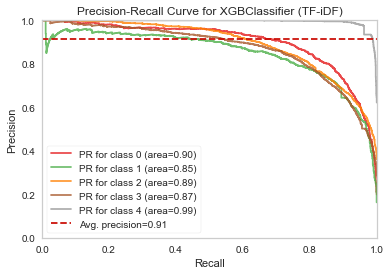

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    XGBClassifier(max_depth=3, random_state=42),
    title="Precision-Recall Curve for XGBClassifier (TF-iDF)", 
    classes=classifier.classes_,
    per_class=True,
    cmap="Set1"
)
viz.fit(X_train,y_train)
score = viz.score(X_test, y_test)
path = reports_dir + method_name + "_prec-recall.png"
viz.show(outpath=path);

In [543]:
score 

0.9134488408196235

In [544]:
store_result(method_name, feature, y_test, y_pred, viz)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

# Models Comparison

In [ ]:
results_df = read_results()
results_df

In [ ]:
def labels(ax):                        
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment


plt.figure(figsize=(7,10))

plt.subplot(311)
results_df = results_df.sort_values(by="Recall_score", ascending=False)
ax=sns.barplot(x="Recall_score", y="Model", data=results_df, palette="Blues_d")
labels(ax)
ax.set_title("Performances for feature:" + feature)

plt.subplot(312)
results_df = results_df.sort_values(by="F1_score", ascending=False)
ax=sns.barplot(x="F1_score", y="Model", data=results_df, palette="Blues_d")
labels(ax)

plt.subplot(313)
results_df = results_df.sort_values(by="Prec_Recall_score", ascending=False)
ax=sns.barplot(x="Prec_Recall_score", y="Model", data=results_df, palette="Blues_d")
labels(ax)
# ax.set_title('subplot 1')


plt.show();